## Getting data from Portfolio Visualizer

Import the libraries

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

Get the html page.

In [2]:
my_url = urlopen('https://www.portfoliovisualizer.com/historical-asset-class-returns')

soup = BeautifulSoup(my_url.read(), 'lxml')

We want to first get just the column names. So we will select them.

In [3]:
col_names = soup.tr

col_names = col_names.text.split('\n')

Lets pring them out and see if we have correctly grabbed them.

In [4]:
col_names

['',
 'Year',
 'Inflation',
 'US Stock Market',
 'US Large Cap',
 'US Large Cap Value',
 'US Large Cap Growth',
 'US Mid Cap',
 'US Mid Cap Value',
 'US Mid Cap Growth',
 'US Small Cap',
 'US Small Cap Value',
 'US Small Cap Growth',
 'US Micro Cap',
 'Global ex-US Stock Market',
 'Intl Developed ex-US Market',
 'International ex-US Small Cap',
 'International ex-US Value',
 'European Stocks',
 'Pacific Stocks',
 'Emerging Markets',
 'Cash',
 'Short Term Treasury',
 'Intermediate Term Treasury',
 '10-year Treasury',
 'Long Term Treasury',
 'Total US Bond Market',
 'TIPS',
 'Global Bonds (Unhedged)',
 'Global Bonds (USD Hedged)',
 'Short-Term Investment Grade',
 'Corporate Bonds',
 'Long-Term Corporate Bonds',
 'High Yield Corporate Bonds',
 'Short-Term Tax-Exempt',
 'Intermediate-Term Tax-Exempt',
 'Long-Term Tax-Exempt',
 'REIT',
 'Gold',
 'Precious Metals',
 'Commodities',
 '']

We can see that there are some empty values, so we will remove them.

In [5]:
col_names = list(filter(None,col_names))

col_names

['Year',
 'Inflation',
 'US Stock Market',
 'US Large Cap',
 'US Large Cap Value',
 'US Large Cap Growth',
 'US Mid Cap',
 'US Mid Cap Value',
 'US Mid Cap Growth',
 'US Small Cap',
 'US Small Cap Value',
 'US Small Cap Growth',
 'US Micro Cap',
 'Global ex-US Stock Market',
 'Intl Developed ex-US Market',
 'International ex-US Small Cap',
 'International ex-US Value',
 'European Stocks',
 'Pacific Stocks',
 'Emerging Markets',
 'Cash',
 'Short Term Treasury',
 'Intermediate Term Treasury',
 '10-year Treasury',
 'Long Term Treasury',
 'Total US Bond Market',
 'TIPS',
 'Global Bonds (Unhedged)',
 'Global Bonds (USD Hedged)',
 'Short-Term Investment Grade',
 'Corporate Bonds',
 'Long-Term Corporate Bonds',
 'High Yield Corporate Bonds',
 'Short-Term Tax-Exempt',
 'Intermediate-Term Tax-Exempt',
 'Long-Term Tax-Exempt',
 'REIT',
 'Gold',
 'Precious Metals',
 'Commodities']

This looks better.

Now we will get all the data, which is in a nice format.

In [6]:
data = []
for t in soup.find_all('td'):
    data.append(t.text)

Lets look at the first 20 and last 20 values.

In [7]:
data[:20]

['1972',
 '3.41%',
 '17.62%',
 '18.95%',
 '15.32%',
 '22.97%',
 '8.02%',
 '11.94%',
 '4.29%',
 '8.66%',
 '11.15%',
 '6.36%',
 '1.01%',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A',
 'N/A']

In [8]:
data[-20:]

['0.60%',
 '2.19%',
 '3.47%',
 '7.29%',
 '2.11%',
 '2.12%',
 '0.35%',
 '1.29%',
 '0.87%',
 '2.45%',
 '5.14%',
 '0.08%',
 '0.37%',
 '1.59%',
 '2.01%',
 '1.17%',
 '4.50%',
 '-0.99%',
 '-10.61%',
 '\n                The annual returns for 2020 are based on monthly returns from January to January.\n            ']

We see that the last row contains some unwanted data. We will remove it now. 

In [9]:
del data[-1]

In [10]:
len(data)

1960

We can see that there are 40 columns and 1960 rows after deleting the last row

In [11]:
len(col_names)

40

Lets create our dataframe with 40 columns. We will make the Year column as our index.

In [12]:
df_returns = pd.DataFrame(np.array(data).reshape(-1,40), columns=col_names)
df_returns['Year'] = pd.to_datetime(df_returns['Year']) - pd.Timedelta(365)

In [13]:
df_returns.head()

,Year,Inflation,US Stock Market,US Large Cap,US Large Cap Value,US Large Cap Growth,US Mid Cap,US Mid Cap Value,US Mid Cap Growth,US Small Cap,...,Corporate Bonds,Long-Term Corporate Bonds,High Yield Corporate Bonds,Short-Term Tax-Exempt,Intermediate-Term Tax-Exempt,Long-Term Tax-Exempt,REIT,Gold,Precious Metals,Commodities
0,1971-12-31 23:59:59.999999635,3.41%,17.62%,18.95%,15.32%,22.97%,8.02%,11.94%,4.29%,8.66%,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,49.02%,N/A,N/A
1,1972-12-31 23:59:59.999999635,8.71%,-18.18%,-16.18%,-9.79%,-23.09%,-24.20%,-13.77%,-32.96%,-32.85%,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,72.96%,N/A,N/A
2,1973-12-31 23:59:59.999999635,12.34%,-27.81%,-26.93%,-21.13%,-32.34%,-26.34%,-19.80%,-32.64%,-27.59%,...,N/A,-2.27%,N/A,N/A,N/A,N/A,N/A,66.15%,N/A,N/A
3,1974-12-31 23:59:59.999999635,6.94%,37.82%,36.95%,40.67%,33.10%,48.69%,56.79%,41.95%,55.13%,...,N/A,9.95%,N/A,N/A,N/A,N/A,N/A,-24.80%,N/A,N/A
4,1975-12-31 23:59:59.999999635,4.86%,26.47%,24.18%,33.32%,14.85%,36.67%,46.79%,26.54%,45.33%,...,N/A,15.35%,N/A,N/A,N/A,N/A,N/A,-4.10%,N/A,N/A


In [14]:
df_returns.set_index('Year', inplace=True)
df_returns = df_returns.apply(lambda x: x.str.replace('%', ''))

In [15]:
df_returns.head()

,Inflation,US Stock Market,US Large Cap,US Large Cap Value,US Large Cap Growth,US Mid Cap,US Mid Cap Value,US Mid Cap Growth,US Small Cap,US Small Cap Value,...,Corporate Bonds,Long-Term Corporate Bonds,High Yield Corporate Bonds,Short-Term Tax-Exempt,Intermediate-Term Tax-Exempt,Long-Term Tax-Exempt,REIT,Gold,Precious Metals,Commodities
Year,,,,,,,,,,,,,,,,,,,,,
1971-12-31 23:59:59.999999635,3.41,17.62,18.95,15.32,22.97,8.02,11.94,4.29,8.66,11.15,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,49.02,N/A,N/A
1972-12-31 23:59:59.999999635,8.71,-18.18,-16.18,-9.79,-23.09,-24.20,-13.77,-32.96,-32.85,-24.12,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,72.96,N/A,N/A
1973-12-31 23:59:59.999999635,12.34,-27.81,-26.93,-21.13,-32.34,-26.34,-19.80,-32.64,-27.59,-21.09,...,N/A,-2.27,N/A,N/A,N/A,N/A,N/A,66.15,N/A,N/A
1974-12-31 23:59:59.999999635,6.94,37.82,36.95,40.67,33.10,48.69,56.79,41.95,55.13,53.94,...,N/A,9.95,N/A,N/A,N/A,N/A,N/A,-24.80,N/A,N/A
1975-12-31 23:59:59.999999635,4.86,26.47,24.18,33.32,14.85,36.67,46.79,26.54,45.33,54.78,...,N/A,15.35,N/A,N/A,N/A,N/A,N/A,-4.10,N/A,N/A


We will also convert `N/A` values to 0.

In [16]:
df_returns = df_returns.apply(lambda x: x.str.replace('N/A', str(0)).astype(float))

Now lets plot and see the results.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

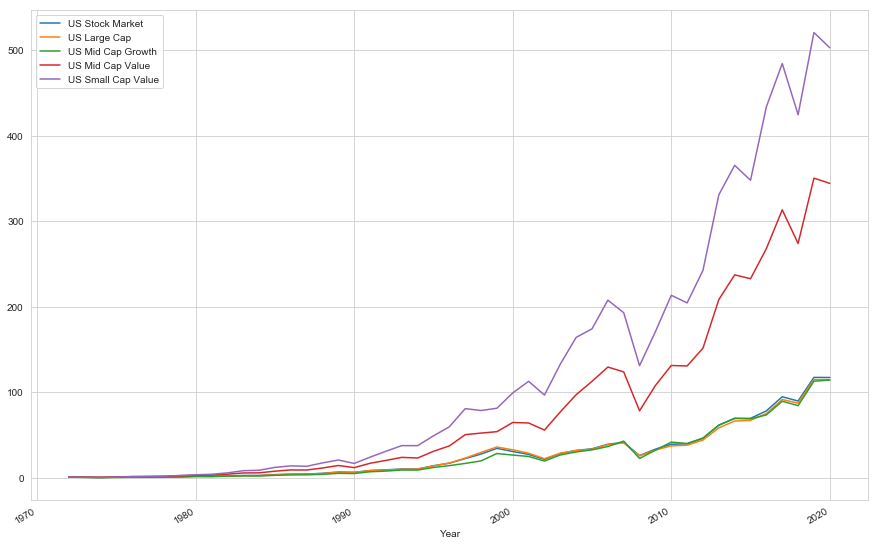

In [18]:
((df_returns[['US Stock Market', 'US Large Cap', 'US Mid Cap Growth', 'US Mid Cap Value', 'US Small Cap Value']] / 100) + 1).cumprod().plot(figsize=(15,10))

We can see that small cap value stocks had the best performance from the above 5 asset classes.